In [1]:
import pandas as pd
import random
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# parametro = 0

## 1) Criando dados ficticios

In [2]:
data = {
    'Media_Total': [random.uniform(2, 10) for _ in range(1000)],
}

# Gerando o coeficiente com base na média
data['Coeficiente'] = [media * random.uniform(0.6, 1.2) for media in data['Media_Total']]

sexos = ['Masculino', 'Feminino']
data['Sexo'] = [random.choice(sexos) for _ in range(1000)]

# Gere aleatoriamente a idade dos alunos entre 18 e 30 anos
data['Idade'] = [random.randint(18, 40) for _ in range(1000)]

df = pd.DataFrame(data)

### 1.1) Normalizando e limpando dados

In [3]:
df = pd.DataFrame(data)
# df['Introducao_a_Programacao_Aprovado'] = [1 if x > 6.0 else 0 for x in df['Introducao_a_Programacao']]
# df['Estrutura_de_Dados_Aprovado'] = [1 if x > 6.0 else 0 for x in df['Estrutura_de_Dados']]

# Codificando o sexo usando one-hot encoding
df = pd.get_dummies(df, columns=['Sexo'], drop_first=True)

# Normalizando a idade usando Min-Max Scaling
scaler = MinMaxScaler()
df['Idade'] = scaler.fit_transform(df[['Idade']])

### 1.2) Criando uma coluna de destino (classificação de desempenho)

In [4]:
def classificar_desempenho(row):
    # and row['Introducao_a_Programacao'] >= 0.7 and row['Estrutura_de_Dados'] >= 0.7:
    if row['Media_Total'] >= 7.5 and row['Coeficiente'] >= 0.8:
        return 'Bom'
    # and row['Introducao_a_Programacao'] >= 0.6 and row['Estrutura_de_Dados'] >= 0.6:
    elif row['Media_Total'] >= 6 and row['Coeficiente'] >= 0.65:
        return 'Medio'
    else:
        return 'Ruim'

df['Desempenho'] = df.apply(classificar_desempenho, axis=1)



### 1.3) Dividir os dados em recursos (X) e rótulos (y)

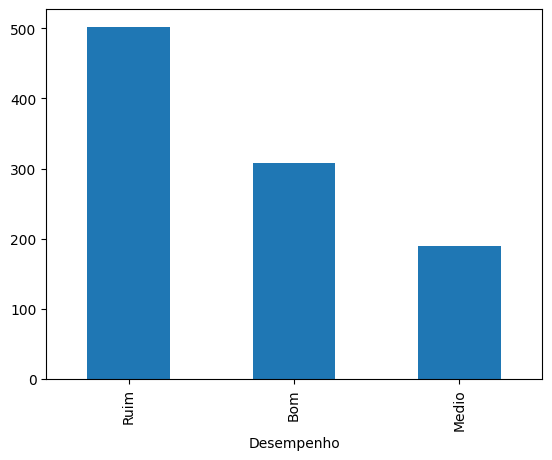

In [5]:
X = df[['Media_Total', 'Coeficiente', 'Idade', 'Sexo_Masculino']]
y = df['Desempenho']

# Visualize the distribution of 'Desempenho'
df['Desempenho'].value_counts().plot(kind='bar')
plt.show()

## 2) Dados de treinamento e teste

### 2.1) Modelos Simples

#### 2.1.1) Divisão dos dados

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2.1.2) Salvando dados

In [7]:
diretorioModeloSimples = f'./ModelosSimples/Conjunto_{parametro}'
if not os.path.exists(diretorioModeloSimples):
    os.makedirs(diretorioModeloSimples)

# Salvar os dados de treinamento
pd.DataFrame(X_train).to_csv(f'./ModelosSimples/Conjunto_{parametro}/X_train.csv', index=False)
pd.DataFrame(y_train).to_csv(f'./ModelosSimples/Conjunto_{parametro}/y_train.csv', index=False)

# Salvar os dados de teste
pd.DataFrame(X_test).to_csv(f'./ModelosSimples/Conjunto_{parametro}/X_test.csv', index=False)
pd.DataFrame(y_test).to_csv(f'./ModelosSimples/Conjunto_{parametro}/y_test.csv', index=False)

### 2.2) Redes Neurais

#### 2.2.1) Pré-processando dados

In [8]:
# Codificar as classes de desempenho em valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#### 2.2.2) Divisão dos dados

In [9]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2.2.3) Salvando dos dados

In [10]:
diretorioRedesNeurais = f'./RedesNeurais/Conjunto_{parametro}'
if not os.path.exists(diretorioRedesNeurais):
    os.makedirs(diretorioRedesNeurais)

# Salvar os dados de treinamento
pd.DataFrame(X_train).to_csv(f'./RedesNeurais/Conjunto_{parametro}/X_train.csv', index=False)
pd.DataFrame(y_train).to_csv(f'./RedesNeurais/Conjunto_{parametro}/y_train.csv', index=False)

# Salvar os dados de teste
pd.DataFrame(X_test).to_csv(f'./RedesNeurais/Conjunto_{parametro}/X_test.csv', index=False)
pd.DataFrame(y_test).to_csv(f'./RedesNeurais/Conjunto_{parametro}/y_test.csv', index=False)

print('Dados salvos com sucesso!')

Dados salvos com sucesso!
